In [214]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [215]:
def get_edges(inst):
    edge = np.zeros(inst.shape, dtype=np.bool)
    edge[:,1:] |= (inst[:,1:] != inst[:,:-1])
    edge[:,:-1] |= (inst[:,1:] != inst[:,:-1])
    edge[1:,:] |= (inst[1:,:] != inst[:-1,:])
    edge[:-1,:] |= (inst[1:,:] != inst[:-1,:])
    return edge

In [216]:
image = cv.imread('/Users/arash/Downloads/image.png')
inst = cv.imread('/Users/arash/Downloads/inst.png', cv.IMREAD_ANYDEPTH)[:, :, None]  # WARNING: NOT DIRECTLY COMPATIBLE WITH UINT8 FORMAT
label = cv.imread('/Users/arash/Downloads/label.png')

In [217]:
# encoding input images to appropriate format
label = label[:, :, 0]
# inst = (inst - inst//1000*1000).astype(np.uint8)

# for i in range(35):
cars_mask = label == 26

In [218]:
nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(cars_mask.astype('uint8'))
# Seperate each car out
car_mask_list = [np.ndarray.astype((labels == i), np.uint8) * 255 for i in range(1, len(np.unique(labels)))]
car_mask = car_mask_list[0]

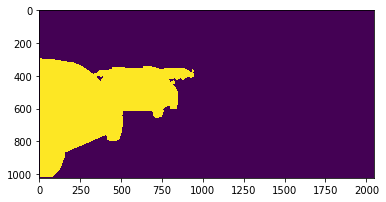

In [219]:
plt.imshow(car_mask)
plt.show()

In [220]:
_, contours, _ = cv.findContours(car_mask, cv.RETR_EXTERNAL, 2)

cnt = contours[0]
x1, y1, w, h = cv.boundingRect(cnt)
print(x1, y1, w, h)

6 294 944 725


In [221]:
def crop_and_resize(input_im, bg):
    """
    Args:
        input_im: image to be cropped
        bg: output background color
        
    Output:
        a 256x256 cropped and resized image
    """
    crop = input_im[y1:y1+h, x1:x1+w]
    crop_resized = cv.resize(crop, (int(w * ratio), int(h * ratio)), interpolation=cv.INTER_NEAREST)
    shape = crop_resized.shape
    m = np.ones((256, 256, 3) if len(input_im.shape) == 3 else (256, 256), dtype=np.uint8) * bg
    m[128-shape[0]//2:128-shape[0]//2+shape[0], 128-shape[1]//2:128-shape[1]//2+shape[1]] = crop_resized
    return m

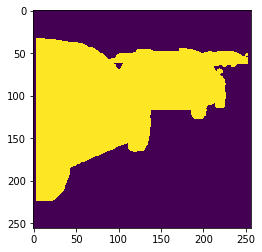

In [222]:
ratio = 250. / max(w, h)
    
m = crop_and_resize(car_mask, 0)
plt.imshow(m); plt.show()

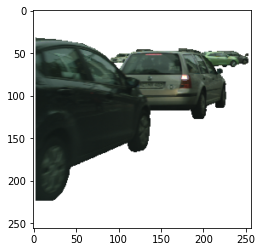

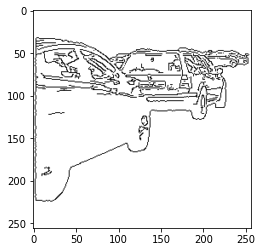

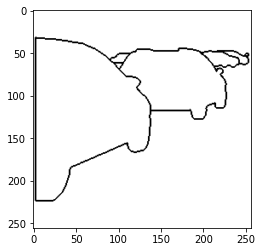

In [229]:
canvas = np.ones(image.shape, dtype=np.uint8) * 255  # white canvas
canvas -= car_mask[:,:, None]
canvas += image * (car_mask[:,:, None]//255)
ss = crop_and_resize(canvas, 255)
dd = 255-get_edges(crop_and_resize(car_mask[:,:]//255 * inst[:,:,0], 0))
sss = 255-cv.Canny(ss, 50, 150)

plt.imshow(cv.cvtColor(ss, cv.COLOR_BGR2RGB), interpolation='bilinear')
plt.show()
plt.imshow(sss, interpolation='bilinear', cmap='gray')
plt.show()
plt.imshow(dd, interpolation='bilinear', cmap='gray')
plt.show()

In [224]:
filename = '_'.join([str(q) for q in [x1, y1, w, h]]) + '.jpg'
print(filename)

6_294_944_725.jpg


---

In [254]:
def stitch_back(canvas, _256x256, x1, y1, w, h):
    resized_w, resized_h = int(250. * w / max(w,h)), int(250. * h / max(w,h))
    crop = _256x256[128-resized_h//2:128-resized_h//2+resized_h, 128-resized_w//2:128-resized_w//2+resized_w]
    print(crop.shape)
    crop_orig_size = cv.resize(crop, (w, h))
    crop_orig_size[crop_orig_size==255] = 0
    canvas[y1:y1+h, x1:x1+w] += crop_orig_size
    return canvas

(192, 250, 3)


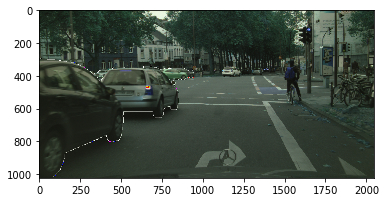

In [255]:
canvas = image * (1-car_mask[:,:,None]//255)
plt.imshow(stitch_back(canvas, ss, x1, y1, w, h))
plt.show()

In [225]:
x1, y1, w, h = [int(q) for q in os.path.splitext(filename)[0].split('_')]
canvas = np.ones(label.shape, np.uint8) * 255  # white canvas

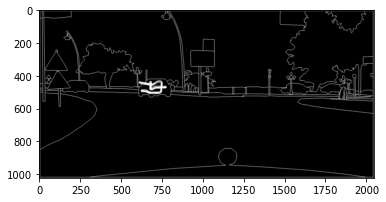

(1024, 2048, 3)


In [227]:
b = cv.imread('/Users/arash/Downloads/2b.png')
edge = get_edges(b)
plt.imshow(np.ndarray.astype(edge, np.uint8) * 255, interpolation='bilinear')
plt.show()
print(edge.shape)

In [228]:
cv.imwrite('1.jpg',np.ndarray.astype(get_edges(m), np.uint8) * 255)
cv.imwrite('2.jpg',np.ndarray.astype(get_edges(m), np.uint8) * 255)
cv.imwrite('3.jpg',np.ndarray.astype(get_edges(m), np.uint8) * 255)

True